In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [26]:
df = pd.read_csv("./datasets/2008_swing_states.csv")

In [27]:
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


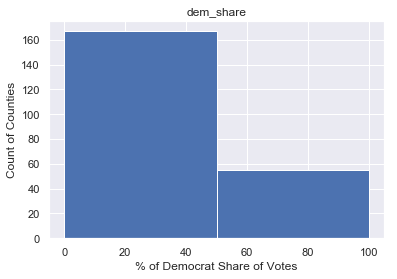

In [28]:
bin_edges = [0,50,100]
df.hist(column='dem_share',bins=bin_edges) #15)
plt.xlabel('% of Democrat Share of Votes')
plt.ylabel('Count of Counties')
plt.show()

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()

In [55]:
df_iris= pd.DataFrame(iris['data'],columns=iris['feature_names'])
df_iris['species']=iris['target']
df_iris['species_names']=iris['target']
df_iris.species_names.replace(dict(enumerate(iris.target_names)),inplace=True)

In [56]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [57]:
df_iris.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,1.000000,NaN
std,0.828066,0.433594,1.764420,0.763161,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


In [93]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
species_names         object
dtype: object

In [74]:
df_iris.shape[0]

150

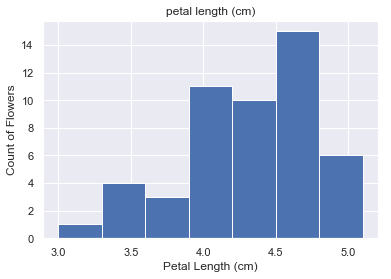

In [83]:
n_bins=int(np.sqrt(df_iris[df_iris['species_names']=='versicolor'].shape[0]))
df_iris[df_iris['species_names']=='versicolor'].hist(column='petal length (cm)',bins=n_bins)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count of Flowers')
plt.show()

In [96]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
species_names         object
dtype: object

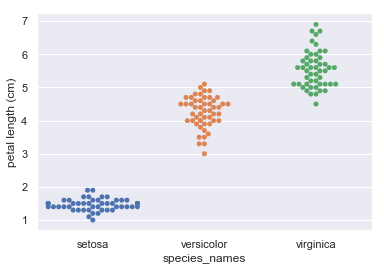

In [99]:
sns.swarmplot(x='species_names',y='petal length (cm)',data=df_iris)
plt.show()

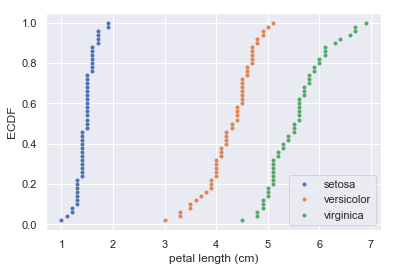

In [113]:
#define ECDFs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_set,y_set=ecdf(df_iris['petal length (cm)'][df_iris['species_names']=='setosa'])
x_vers,y_vers=ecdf(df_iris['petal length (cm)'][df_iris['species_names']=='versicolor'])
x_virg,y_virg=ecdf(df_iris['petal length (cm)'][df_iris['species_names']=='virginica'])


# Plot all ECDFs on the same plot
plt.plot(x_set,y_set,marker='.',linestyle='none')
plt.plot(x_vers,y_vers,marker='.',linestyle='none')
plt.plot(x_virg,y_virg,marker='.',linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

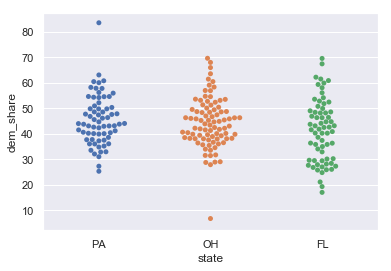

In [89]:
sns.swarmplot(x='state',y='dem_share',data=df)
plt.show()

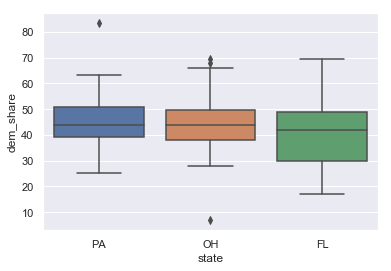

In [127]:
sns.boxplot(x='state',y='dem_share',data=df)
plt.show()

In [129]:
print('mean:',np.mean(df['dem_share']))
print('median:',np.median(df['dem_share']))

mean: 43.76441441441444
median: 43.185


In [107]:
group = df.groupby(by='state')

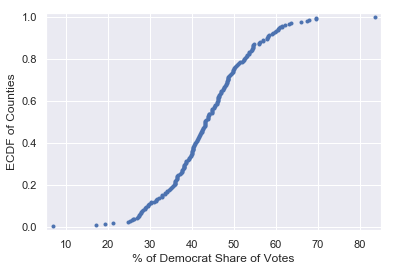

In [109]:
#making an emperical cumulative distribution function (ECDF)
group = df.groupby(by='state')
x=np.sort(df['dem_share'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('% of Democrat Share of Votes')
plt.ylabel('ECDF of Counties')
plt.margins(0.02)
plt.show()

In [125]:
np.percentile(df['dem_share'],[25,50,75])

array([37.3025, 43.185 , 49.925 ])